# LAITA Sami

# Graph Learning
## Lab 2: PageRank

In this lab, you will learn to compute, use and interpret various [PageRank](https://en.wikipedia.org/wiki/PageRank) scores.

## Import

In [2]:
from IPython.display import SVG

In [3]:
import numpy as np
from scipy import sparse

In [4]:
from sknetwork.data import load_netset, linear_graph, miserables
from sknetwork.linalg import normalize
from sknetwork.ranking import PageRank
from sknetwork.visualization import visualize_graph


## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paris.fr/) collection for details):
* Openflights (graph)
* WikiVitals (directed graph)
* Cinema (bipartite graph)

In [5]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')
cinema = load_netset('cinema')

Parsing files...
Done.
Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

The PageRank corresponds to the stationary distribution of a random walk with restart probability $1-\alpha$. Unless otherwise specified, we take the default value $\alpha = 0.85$ and the restart probability distribution is uniform over the set of nodes.

## Linear graph

Consider a linear graph:

In [6]:
n = 10

In [7]:
dataset = linear_graph(n, True)
adjacency = dataset.adjacency
position = dataset.position

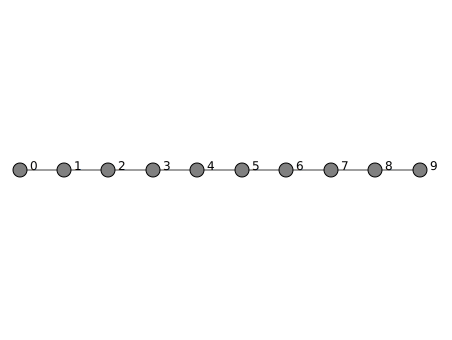

In [8]:
image = visualize_graph(adjacency, position, names=np.arange(n))
SVG(image)

## To do

* What are the two best ranked nodes? Try with different values of $\alpha$ and interpret the results.
* What is the exact PageRank vector when $\alpha=1$ (no restarts)? Justify your answer.

In [9]:
pagerank = PageRank(damping_factor=0.85, solver='lanczos')

In [10]:
scores = pagerank.fit_predict(adjacency)
print(scores)

[0.06438442 0.11619864 0.1093456  0.10579102 0.10428032 0.10428032
 0.10579102 0.1093456  0.11619864 0.06438442]


In [11]:
image = visualize_graph(adjacency, position, names=np.arange(n), scores=scores)
SVG(image)

<div style="
    background-color:rgb(60, 2, 185);
    padding: 15px 20px;
    border-radius: 8px;
    border-left: 5px solid #1890ff;
    margin: 15px 0;
    font-size: 2.5em;
    box-shadow: 0 2px 4px rgba(0,0,0,0.1);
">
Answers
</div>


- For $\alpha=0.9999$, we have nodes {1, 2, 3, 4, 5, 6, 7, 8} all with the same best score( approximately 0.1111).
- For $\alpha=0.85$, we have nodes {1 , 8} with the best score( approximately 0.11).
- For $\alpha=0.5$, we have nodes {1, 8} all with the same best score( approximately 0.11), but the probability of node {0 ,9} increase a bit.
- These results demonstrate the impact of the damping factor $\alpha$ on PageRank:  For $\alpha \approx 1$ (e.g., $0.9999$), scores converge to the degree distribution, with middle nodes ($1$–$8$) having equal highest rank ($\sim 0.1111$). For $\alpha = 0.85$, restart bias favors endpoints ($1$ and $8$) slightly ($\sim 0.11$). For $\alpha = 0.5$, frequent restarts flatten scores but endpoints ($0$ and $9$) gain slightly due to uniform teleportation.  
- We can explain that for $\alpha=0.85$, we have nodes {1 , 8} with best score, because if we have and random walk and we are in nodes 0 or 9 with proba equal to 1 we move to the nodes 1 and 8.
- This confirms $\alpha$'s role in balancing **graph structure** ($\alpha \to 1$) and **uniform redistribution** ($\alpha \to 0$). 


### PageRank Vector for $\alpha=1$ (No Restarts)

For $\alpha=1$, the PageRank vector $\pi$ equals the stationary distribution of the pure random walk:

The PageRank vector is proportional to the Degree distribution:  
   $\text{degrees} = (1, 2, 2, \ldots, 2, 1)$  
   (End nodes have degree $1$, others degree $2$)

After we have to proceed to Normalization ;  
   - Total degree sum $2m = 18$ ($m=9$ edges)  
   - Each component: $\pi_i = \frac{\text{degree}(i)}{2m}$

**Resulting vector**:  
$$\pi = \frac{1}{18}(1, 2, 2, 2, 2, 2, 2, 2, 2, 1)$$
   


## Les Misérables


In [12]:
dataset = miserables(True)

In [13]:
adjacency = dataset.adjacency
position = dataset.position
names = dataset.names

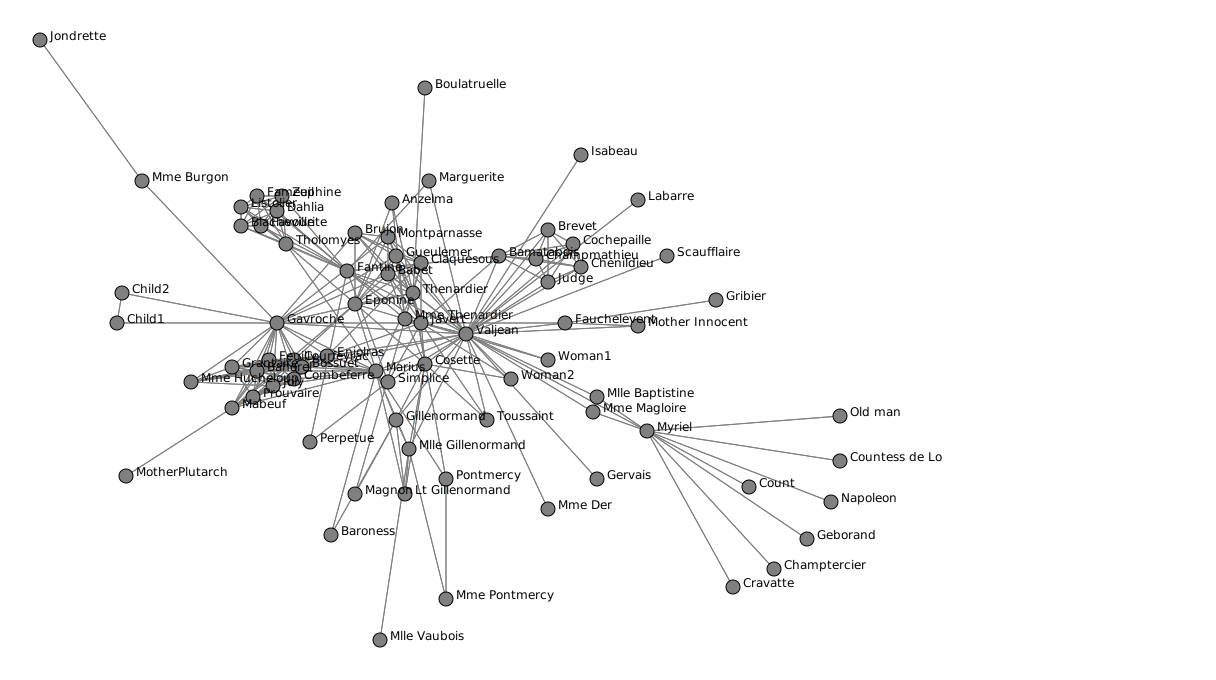

In [14]:
image = visualize_graph(adjacency, position, names, scale=2)
SVG(image)

## To do

* Display the graph of Les Misérables with PageRank scores.
* List the 10 best ranked characters.
* Compare with:
    1. the 10 nodes of highest degrees
    2. the 10 nodes of highest weights
* Try different values of $\alpha$ and interpret the results.

In [15]:
pagerank = PageRank(damping_factor=0.85)

In [16]:
scores = pagerank.fit_predict(adjacency)

In [17]:
# scores in log scale appear more clearly
image = visualize_graph(adjacency, position, names, scores=np.log(scores), scale=2)
SVG(image)

<div style="
    background-color:rgb(60, 2, 185);
    padding: 15px 20px;
    border-radius: 8px;
    border-left: 5px solid #1890ff;
    margin: 15px 0;
    font-size: 2.5em;
    box-shadow: 0 2px 4px rgba(0,0,0,0.1);
">
Answers</div>

In [18]:
top10_indices = np.argsort(-scores)[:10]  # argsort par ordre décroissant
# Affichage des noms et scores correspondants
print("Best 10 characters ranked by PageRank:")
for i, idx in enumerate(top10_indices, 1):
    print(f"{i}. {names[idx]}: {scores[idx]:.5f}")


Best 10 characters ranked by PageRank:
1. Valjean: 0.10029
2. Marius: 0.05160
3. Myriel: 0.03980
4. Cosette: 0.03706
5. Enjolras: 0.03611
6. Thenardier: 0.03579
7. Courfeyrac: 0.03247
8. Gavroche: 0.02803
9. Fantine: 0.02716
10. Javert: 0.02690


In [19]:

# Convertir la matrice d'adjacence en binaire (1 si connexion existe, 0 sinon)
binary_adjacency = (adjacency > 0).astype(int)

# Calcul des degrés (nombre de connexions non pondérées)
degrees = np.array(binary_adjacency.sum(axis=1)).flatten()

# Tri des indices par degré décroissant
top_degree_indices = np.argsort(-degrees)[:10]

# Affichage des résultats
print("Best 10 ranked characters by degree (non weighted):")
for rank, idx in enumerate(top_degree_indices, 1):
    print(f"{rank}. {names[idx]} - Connexions: {int(degrees[idx])}")

Best 10 ranked characters by degree (non weighted):
1. Valjean - Connexions: 36
2. Gavroche - Connexions: 22
3. Marius - Connexions: 19
4. Javert - Connexions: 17
5. Thenardier - Connexions: 16
6. Enjolras - Connexions: 15
7. Fantine - Connexions: 15
8. Courfeyrac - Connexions: 13
9. Bossuet - Connexions: 13
10. Bahorel - Connexions: 12


In [20]:

# Calcul du degré pondéré (somme des poids des arêtes sortantes)
weighted_degrees = np.array(adjacency.sum(axis=1)).flatten()

# Récupération des indices des 10 plus grands degrés pondérés
top10_weighted_indices = np.argsort(-weighted_degrees)[:10]

# Affichage des résultats
print("Best 10 ranked characters by weighted degree:")
for i, idx in enumerate(top10_weighted_indices, 1):
    print(f"{i}. {names[idx]}: {weighted_degrees[idx]:.2f} ")

Best 10 ranked characters by weighted degree:
1. Valjean: 158.00 
2. Marius: 104.00 
3. Enjolras: 91.00 
4. Courfeyrac: 84.00 
5. Combeferre: 68.00 
6. Cosette: 68.00 
7. Bossuet: 66.00 
8. Thenardier: 61.00 
9. Gavroche: 56.00 
10. Javert: 47.00 


### Effect of Changing $\alpha$ in PageRank

When we vary the damping factor $\alpha \in (0,1)$, the PageRank vector $\pi$ evolves as follows:

1. **$\alpha \approx 1$ (e.g., 0.99)**:
   - Random walks rarely restart ($r \approx 0$)
   - $\pi$ converges to degree centrality:  
     $$\pi_i \approx \frac{\text{degree}(i)}{2m}$$
   - Top 10 matches highest degree nodes
   - *Example*: Valjean dominates (highest degree)

2. **$\alpha = 0.85$ (default)**:
   - Balanced behavior:  
     $$\pi = \alpha P\pi + (1-\alpha)\frac{1}{N}$$
   - Identifies structural importance beyond just degrees

3. **$\alpha \to 0$ (e.g., 0.5)**:
   - Scores approach uniform distribution:  
     $$\pi_i \approx \frac{1}{N}$$
   - Loses graph structure information



## Openflights


In [21]:
dataset = openflights

In [22]:
adjacency = dataset.adjacency
position = dataset.position
names = dataset.names


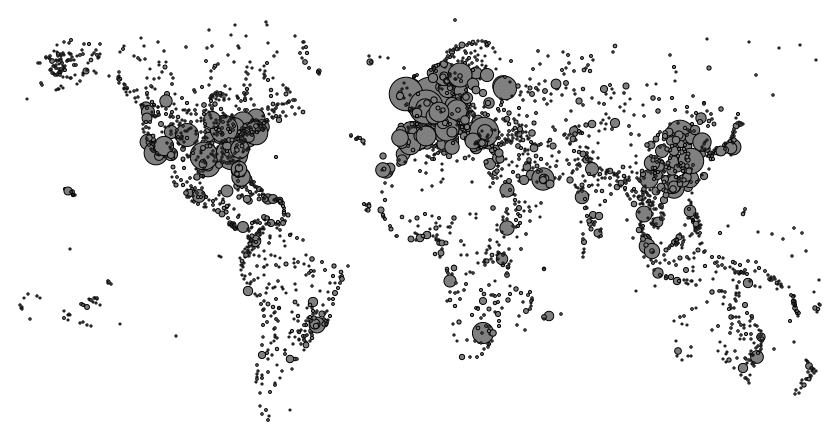

In [23]:
# hide the edges for better visualization
image = visualize_graph(adjacency, position, width=800, height=400, display_node_weight=True, display_edges=False)
SVG(image)

## To do

* Display the same world map with PageRank scores (in log scale).
* List the 10 best ranked airports, and compare with the 10 airports of highest traffic.
* Display the world map with Personalized PageRank scores, starting from Tokyo international airport.
* List the corresponding 10 best ranked airports.

In [24]:
pagerank = PageRank()

In [25]:
scores = pagerank.fit_predict(adjacency)

In [26]:
image = visualize_graph(adjacency, position, scores=np.log(scores), node_order=np.argsort(scores), 
                  width=800, height=400, display_node_weight=True, display_edges=False)
SVG(image)

<div style="
    background-color:rgb(60, 2, 185);
    padding: 15px 20px;
    border-radius: 8px;
    border-left: 5px solid #1890ff;
    margin: 15px 0;
    font-size: 2.5em;
    box-shadow: 0 2px 4px rgba(0,0,0,0.1);
">
Answers</div>

In [27]:
# Top 10 by PageRank
top_pagerank = names[np.argsort(-scores)[:10]]
print("Top 10 PageRank Airports:", top_pagerank)

# Top 10 by Traffic (degree centrality)
degrees = np.array(adjacency.sum(axis=1)).flatten()
top_traffic = names[np.argsort(-degrees)[:10]]
print("\nTop 10 by Traffic:", top_traffic)

Top 10 PageRank Airports: ['Hartsfield Jackson Atlanta International Airport'
 'Dallas Fort Worth International Airport' 'Amsterdam Airport Schiphol'
 "Chicago O'Hare International Airport" 'Denver International Airport'
 'Charles de Gaulle International Airport' 'Atatürk International Airport'
 'OR Tambo International Airport' 'Los Angeles International Airport'
 'Domodedovo International Airport']

Top 10 by Traffic: ['Amsterdam Airport Schiphol' 'Charles de Gaulle International Airport'
 'Dublin Airport' 'Munich International Airport'
 'Hartsfield Jackson Atlanta International Airport'
 'London Gatwick Airport' 'Frankfurt am Main International Airport'
 'Atatürk International Airport' 'Dallas Fort Worth International Airport'
 'Beijing Capital International Airport']


In [28]:
# Create personalization vector
tokyo_idx = np.where(names == 'Tokyo Haneda International Airport')[0][0]
personalization = np.zeros(adjacency.shape[0])
personalization[tokyo_idx] = 1

# Compute personalized PageRank
ppr = PageRank(damping_factor=0.99)
ppr_scores = ppr.fit_predict(adjacency, personalization)

# Visualization
image = visualize_graph(adjacency, position, scores=np.log(ppr_scores),
                  node_order=np.argsort(ppr_scores), width=800, height=400,
                  display_node_weight=True, display_edges=False)
SVG(image)

In [29]:
top_ppr = names[np.argsort(-ppr_scores)[:10]]
print("Top 10 Personalized PageRank from Tokyo:", top_ppr)

Top 10 Personalized PageRank from Tokyo: ['Tokyo Haneda International Airport'
 'Shanghai Pudong International Airport' 'Incheon International Airport'
 'Beijing Capital International Airport'
 'Taiwan Taoyuan International Airport'
 'Chek Lap Kok International Airport' 'Narita International Airport'
 'Guangzhou Baiyun International Airport'
 'Kunming Changshui International Airport' 'Naha Airport']


## 2. Directed graphs

## Wikipedia Vitals

In [44]:
dataset = wikivitals

In [45]:
adjacency = dataset.adjacency
names = dataset.names

## To do

* List the 10 best ranked articles of Wikipedia Vitals.
* Compare with the 10 nodes of highest out-degrees and the 10 nodes of highest in-degrees. Interpret the results.
* Which article of Wikipedia Vitals is in the top-20 of PageRank but not in the top-20 of in-degrees?

<div style="
    background-color:rgb(60, 2, 185);
    padding: 15px 20px;
    border-radius: 8px;
    border-left: 5px solid #1890ff;
    margin: 15px 0;
    font-size: 2.5em;
    box-shadow: 0 2px 4px rgba(0,0,0,0.1);
">
Answers</div>

In [32]:

# 1. Calculate PageRank and get top 10
pagerank = PageRank(damping_factor=0.85)
scores = pagerank.fit_predict(adjacency)
top10_pagerank = names[np.argsort(-scores)[:10]]

# 2. Calculate degrees and get top 10 for each
out_degrees = np.array(adjacency.sum(axis=1)).flatten()  # Outgoing links
in_degrees = np.array(adjacency.sum(axis=0)).flatten()   # Incoming links
top10_out = names[np.argsort(-out_degrees)[:10]]
top10_in = names[np.argsort(-in_degrees)[:10]]

# 3. Find article in PageRank top-20 but not in-degree top-20
top20_pagerank = set(names[np.argsort(-scores)[:20]])
top20_in = set(names[np.argsort(-in_degrees)[:20]])
unique_article = list(top20_pagerank - top20_in)[0]

# Print all results
print("=== Wikipedia Vitals Analysis ===")
print("\n Top 10 Articles by PageRank:")
for i, article in enumerate(top10_pagerank, 1):
    print(f"{i}. {article} (Score: {scores[np.where(names == article)[0][0]]:.4f})")

print("\n Top 10 by Out-Degree (most outgoing links):")
for i, article in enumerate(top10_out, 1):
    print(f"{i}. {article} ({int(out_degrees[np.where(names == article)[0][0]])} links)")

print("\n Top 10 by In-Degree (most incoming links):")
for i, article in enumerate(top10_in, 1):
    print(f"{i}. {article} ({int(in_degrees[np.where(names == article)[0][0]])} links)")

print("\n Special Case Article:")
print(f"'{unique_article}' is in PageRank top-20 but not in-degree top-20")


=== Wikipedia Vitals Analysis ===

 Top 10 Articles by PageRank:
1. United States (Score: 0.0021)
2. World War II (Score: 0.0018)
3. The New York Times (Score: 0.0018)
4. Geographic coordinate system (Score: 0.0016)
5. Latin (Score: 0.0015)
6. India (Score: 0.0015)
7. China (Score: 0.0015)
8. France (Score: 0.0014)
9. United Kingdom (Score: 0.0014)
10. World War I (Score: 0.0012)

 Top 10 by Out-Degree (most outgoing links):
1. Europe (680 links)
2. Africa (576 links)
3. History of art (574 links)
4. France (566 links)
5. Human history (542 links)
6. Latin America (542 links)
7. South America (536 links)
8. Asia (495 links)
9. Biology (453 links)
10. Human (451 links)

 Top 10 by In-Degree (most incoming links):
1. United States (1993 links)
2. The New York Times (1684 links)
3. World War II (1658 links)
4. India (1513 links)
5. China (1493 links)
6. France (1390 links)
7. Geographic coordinate system (1363 links)
8. United Kingdom (1305 links)
9. Latin (1212 links)
10. Australia (1107

## To do

* List the 20 closest articles to **Picasso** in Wikipedia Vitals. Who is the best ranked painter other than Picasso?
* List the 20 closest articles to both **Cat** and **Dog** in Wikipedia Vitals.
* In both cases, do the same using the difference between the Personalized PageRank score and the PageRank score. Interpret the results.

<div style="
    background-color:rgb(60, 2, 185);
    padding: 15px 20px;
    border-radius: 8px;
    border-left: 5px solid #1890ff;
    margin: 15px 0;
    font-size: 2.5em;
    box-shadow: 0 2px 4px rgba(0,0,0,0.1);
">
Answers</div>

## Picasso :

In [33]:


# 1. Base PageRank (for comparison)
base_pagerank = PageRank(damping_factor=0.85).fit_predict(adjacency)

# 2. Personalized PageRank from Picasso
picasso_idx = np.where(names == "Pablo Picasso")[0][0]
personalization = np.zeros(len(names))
personalization[picasso_idx] = 1
picasso_scores = PageRank(damping_factor=0.85).fit_predict(adjacency, personalization)

# 3. Get top 20 closest articles
top20_indices = np.argsort(-picasso_scores)[:20]
top20_picasso = [(names[i], picasso_scores[i]) for i in top20_indices]

# 4. Find best-ranked painter (excluding Picasso)
painters = ["Leonardo da Vinci", "Vincent van Gogh", "Michelangelo", 
            "Rembrandt", "Claude Monet", "Salvador Dalí"]
painter_scores = {p: base_pagerank[np.where(names == p)[0][0]] 
                 for p in painters if p in names and p != "Pablo Picasso"}
best_painter = max(painter_scores.items(), key=lambda x: x[1])

# Print results
#print("=== Picasso in Wikipedia Vitals ===")
#print("\n20 Closest Articles to Picasso:")
#for rank, (article, score) in enumerate(top20_picasso, 1):
    #print(f"{rank}. {article} (Score: {score:.5f})")

print(f"\nBest-Ranked Painter (excluding Picasso): {best_painter[0]} (Base PageRank: {best_painter[1]:.5f})")

print("\nMost Picasso-Specific Connections (PPR - Base PR):")
differences = picasso_scores - base_pagerank
top20_specific = sorted(zip(names, differences), key=lambda x: -x[1])[:20]
for rank, (article, diff) in enumerate(top20_specific, 1):
    print(f"{rank}. {article} (+{diff:.5f})")


Best-Ranked Painter (excluding Picasso): Leonardo da Vinci (Base PageRank: 0.00023)

Most Picasso-Specific Connections (PPR - Base PR):
1. Pablo Picasso (+0.15117)
2. Modernism (+0.00175)
3. Museum of Modern Art (+0.00171)
4. Cubism (+0.00160)
5. Paris (+0.00160)
6. Impressionism (+0.00151)
7. Surrealism (+0.00148)
8. Symbolism (arts) (+0.00148)
9. Modern art (+0.00146)
10. Metropolitan Museum of Art (+0.00139)
11. Paul Cézanne (+0.00139)
12. Post-Impressionism (+0.00136)
13. Vincent van Gogh (+0.00135)
14. Dada (+0.00135)
15. Édouard Manet (+0.00131)
16. Paul Gauguin (+0.00131)
17. Expressionism (+0.00131)
18. Romanticism (+0.00129)
19. World War I (+0.00128)
20. Henri Matisse (+0.00126)


## Cat and Dog :

In [47]:

# 1. Base PageRank (for comparison)
base_scores = PageRank(damping_factor=0.85).fit_predict(adjacency)

# 2. Combined Personalized PageRank (Cat + Dog)
def combined_personalization(articles, weight=0.5):
    """Create personalization vector for multiple articles"""
    personalization = np.zeros(len(names))
    for article in articles:
        idx = np.where(names == article)[0][0]
        personalization[idx] = weight
    return personalization / len(articles)

# Equal weighting for Cat and Dog
personalization = combined_personalization(["Cat", "Dog"])
combined_scores = PageRank(damping_factor=0.85).fit_predict(adjacency, personalization)

# 3. Get top 20 closest articles
top20_indices = np.argsort(-combined_scores)[:20]
top20_combined = [(names[i], combined_scores[i]) for i in top20_indices]

# 4. Difference analysis (specificity)
differences = combined_scores - base_scores
top20_specific = sorted(zip(names, differences), key=lambda x: -x[1])[:20]

# Print results
#print("=== Cat & Dog in Wikipedia Vitals ===")
#print("\n20 Closest Articles to Both Cat and Dog:")
#for rank, (article, score) in enumerate(top20_combined, 1):
    #print(f"{rank}. {article} (Score: {score:.5f})")

print("\n20 Most Specific Connections (PPR - Base PR):")
for rank, (article, diff) in enumerate(top20_specific, 1):
    print(f"{rank}. {article} (+{diff:.5f})")


20 Most Specific Connections (PPR - Base PR):
1. Dog (+0.07654)
2. Cat (+0.07645)
3. Animal (+0.00217)
4. Mammal (+0.00217)
5. Taxonomy (biology) (+0.00214)
6. Chordate (+0.00200)
7. Carnivora (+0.00192)
8. Fox (+0.00188)
9. Leopard (+0.00188)
10. Pinniped (+0.00188)
11. Hyena (+0.00188)
12. Coyote (+0.00188)
13. Bear (+0.00188)
14. Brown bear (+0.00188)
15. Polar bear (+0.00187)
16. Weasel (+0.00187)
17. Skunk (+0.00187)
18. Felidae (+0.00187)
19. Lion (+0.00187)
20. Mustelidae (+0.00186)


# *Conclusion*  : 
- The analysis reveals an important distinction between standard Personalized PageRank (PPR) and the difference method. When using standard PPR, the highest-ranked articles consistently include general knowledge hubs like World War II, the United States, and the New York Times, regardless of the seed article. This occurs because these widely-connected nodes naturally accumulate high scores in any random walk through the network, due to their central positions in Wikipedia's link structure.

- However, when we examine the difference between PPR and the base PageRank scores, we uncover more meaningful, topic-specific relationships. For instance, with Picasso as our seed article, the difference method surfaces strongly associated nodes like Van Gogh, Cubism, and major art museums that don't rank as highly in the global PageRank. Same thing for cat and dog, we find articles related to animals. These connections represent genuine conceptual relationships rather than just structural centrality in the network.

## To do

* List 5 representative articles of each category.

<div style="
    background-color:rgb(60, 2, 185);
    padding: 15px 20px;
    border-radius: 8px;
    border-left: 5px solid #1890ff;
    margin: 15px 0;
    font-size: 2.5em;
    box-shadow: 0 2px 4px rgba(0,0,0,0.1);
">
Answers</div>

In [35]:
# there are 11 categories
labels = dataset.labels
names_labels = dataset.names_labels


# Get PageRank scores
pagerank_scores = PageRank(damping_factor=0.85).fit_predict(adjacency)


# Prepare article indices per category
category_articles = [[] for _ in range(len(names_labels))]
for idx, label in enumerate(labels):
    category_articles[label].append(idx)

# For each category, get top 5 articles by PageRank score
for label_index, category_name in enumerate(names_labels):
    indices = category_articles[label_index]
    top_indices = sorted(indices, key=lambda i: -pagerank_scores[i])[:5]
    
    print(f"\nCategory: {category_name}")
    for i in top_indices:
        print(f"  - {names[i]} (score: {pagerank_scores[i]:.5f})")



Category: Arts
  - Encyclopædia Britannica (score: 0.00095)
  - Oxford English Dictionary (score: 0.00047)
  - Romanticism (score: 0.00039)
  - Modernism (score: 0.00036)
  - Baroque (score: 0.00033)

Category: Biological and health sciences
  - Taxonomy (biology) (score: 0.00086)
  - Animal (score: 0.00075)
  - Protein (score: 0.00057)
  - Bacteria (score: 0.00052)
  - Plant (score: 0.00051)

Category: Everyday life
  - Association football (score: 0.00054)
  - Basketball (score: 0.00034)
  - Olympic Games (score: 0.00030)
  - Cricket (score: 0.00023)
  - Baseball (score: 0.00023)

Category: Geography
  - United States (score: 0.00207)
  - Geographic coordinate system (score: 0.00156)
  - India (score: 0.00147)
  - China (score: 0.00145)
  - France (score: 0.00139)

Category: History
  - World War II (score: 0.00183)
  - World War I (score: 0.00115)
  - Soviet Union (score: 0.00096)
  - Middle Ages (score: 0.00093)
  - Roman Empire (score: 0.00087)

Category: Mathematics
  - Mathemat

## 3. Bipartite graphs

## Cinema

In [36]:
dataset = cinema

In [37]:
biadjacency = dataset.biadjacency
movies = dataset.names_row
actors = dataset.names_col

## To do


* List the 5 closest actors and the 5 closest movies to **Catherine Deneuve**.

<div style="
    background-color:rgb(60, 2, 185);
    padding: 15px 20px;
    border-radius: 8px;
    border-left: 5px solid #1890ff;
    margin: 15px 0;
    font-size: 2.5em;
    box-shadow: 0 2px 4px rgba(0,0,0,0.1);
">
Answers</div>

In [38]:
import numpy as np
from scipy import sparse
from sknetwork.ranking import PageRank

# Get data
biadjacency = dataset.biadjacency
movies = dataset.names_row
actors = dataset.names_col

n_movies = len(movies)
n_actors = len(actors)

# Create sparse combined adjacency matrix
top = sparse.hstack([sparse.csr_matrix((n_movies, n_movies)), biadjacency])
bottom = sparse.hstack([biadjacency.T, sparse.csr_matrix((n_actors, n_actors))])
adjacency = sparse.vstack([top, bottom]).tocsr()

# Find Deneuve's index in combined matrix
deneuve_idx = n_movies + np.where(actors == 'Catherine Deneuve')[0][0]

# Run Personalized PageRank

personalization = {deneuve_idx: 1}
scores = PageRank(damping_factor=0.85).fit_predict(adjacency, personalization)


# Extract top actors (from second half of scores)
actor_scores = scores[n_movies:]
actor_scores[deneuve_idx - n_movies] = 0  # exclude Deneuve herself
top_actor_indices = np.argsort(-actor_scores)[:5]
top_actors = [(actors[i], actor_scores[i]) for i in top_actor_indices]

# Extract top movies (from first half of scores)
movie_scores = scores[:n_movies]
# exclude movies she's in
deneuve_movies = biadjacency[:, deneuve_idx - n_movies].nonzero()[0]
movie_scores[deneuve_movies] = 0
top_movie_indices = np.argsort(-movie_scores)[:5]
top_movies = [(movies[i], movie_scores[i]) for i in top_movie_indices]

# Print results
print("5 Closest Actors to Catherine Deneuve:")
for rank, (actor, score) in enumerate(top_actors, 1):
    print(f"{rank}. {actor} (score: {score:.4f})")

print("\n5 Closest Movies to Catherine Deneuve:")
for rank, (movie, score) in enumerate(top_movies, 1):
    print(f"{rank}. {movie} (score: {score:.4f})")


5 Closest Actors to Catherine Deneuve:
1. Marcello Mastroianni (score: 0.0066)
2. Gérard Depardieu (score: 0.0060)
3. Michel Piccoli (score: 0.0053)
4. Chiara Mastroianni (score: 0.0042)
5. Jean-Louis Trintignant (score: 0.0033)

5 Closest Movies to Catherine Deneuve:
1. Macadam Stories (score: 0.0006)
2. The Trial of Joan of Arc (score: 0.0004)
3. Hell (1994 film) (score: 0.0004)
4. Gramps Is in the Resistance (score: 0.0003)
5. I Can't Sleep (score: 0.0003)


## 4. Directed graphs as bipartite graphs

Directed graphs can be represented as bipartite graphs by duplicating each node, one as source of edges and the other as destination of edges. The biadjacency matrix of the bipartite graph is simply the adjacency matrix of the directed graph. 

The PageRank scores obtained with the bipartite graph differ from those obtained with the directed graph: they correspond to the **forward-backward** random walk in the directed graph, edges being alternately followed in forward and backward directions.

## Wikipedia Vitals

In [39]:
dataset = wikivitals

In [40]:
adjacency = dataset.adjacency
names = dataset.names

## To do

Do the same experiments as above and compare both rankings:
* List the 10 best ranked articles of Wikipedia Vitals. 
* List the 20 closest articles to **Picasso** in Wikipedia Vitals. 
* List the 20 closest articles to both **Cat** and **Dog** in Wikipedia Vitals.

<div style="
    background-color:rgb(60, 2, 185);
    padding: 15px 20px;
    border-radius: 8px;
    border-left: 5px solid #1890ff;
    margin: 15px 0;
    font-size: 2.5em;
    box-shadow: 0 2px 4px rgba(0,0,0,0.1);
">
Answers</div>

## 10 Best Ranked articles in WikiVitals

In [41]:
# Standard PageRank
standard_scores = PageRank().fit_predict(adjacency)
top10_standard = names[np.argsort(-standard_scores)[:10]]

# Bipartite-derived PageRank (forward-backward)
bipartite_scores = PageRank().fit_predict(adjacency, force_bipartite=True)
top10_bipartite = names[np.argsort(-bipartite_scores)[:10]]

print("Standard PageRank Top 10:")
for i, name in enumerate(top10_standard, 1):
    print(f"{i}. {name}")

print("\nBipartite PageRank Top 10:")
for i, name in enumerate(top10_bipartite, 1):
    print(f"{i}. {name}")

Standard PageRank Top 10:
1. United States
2. World War II
3. The New York Times
4. Geographic coordinate system
5. Latin
6. India
7. China
8. France
9. United Kingdom
10. World War I

Bipartite PageRank Top 10:
1. Europe
2. History of art
3. France
4. Africa
5. Human history
6. Latin America
7. South America
8. Biology
9. Human
10. Asia


## 20 Best ranked articles related to Picasso 

In [42]:
# Personalized PageRank comparisons
picasso_idx = np.where(names == "Pablo Picasso")[0][0]

# Standard
std_personalization = np.zeros(len(names))
std_personalization[picasso_idx] = 1
std_picasso_scores = PageRank().fit_predict(adjacency, std_personalization)

# Bipartite
bip_picasso_scores = PageRank().fit_predict(adjacency, std_personalization, force_bipartite=True)

# Get top 20 for each
std_top20 = names[np.argsort(-std_picasso_scores)[:20]]
bip_top20 = names[np.argsort(-bip_picasso_scores)[:20]]

print("\nStandard PPR - Picasso's 20 Closest:")
print(std_top20)

print("\nBipartite PPR - Picasso's 20 Closest:")
print(bip_top20)



Standard PPR - Picasso's 20 Closest:
['Pablo Picasso' 'The New York Times' 'World War II' 'World War I' 'Paris'
 'Modernism' 'Museum of Modern Art' 'Cubism' 'Romanticism' 'Impressionism'
 'Metropolitan Museum of Art' 'Symbolism (arts)' 'Surrealism' 'Modern art'
 'United States' 'Time (magazine)' 'Paul Cézanne' 'Vincent van Gogh'
 'Post-Impressionism' 'Dada']

Bipartite PPR - Picasso's 20 Closest:
['Pablo Picasso' 'Modernism' 'Cubism' 'Modern art' 'Impressionism'
 'Surrealism' "Les Demoiselles d'Avignon" 'Symbolism (arts)'
 'Modern architecture' 'Abstract expressionism' 'Expressionism' 'Pop art'
 'Dada' 'Avant-garde' 'Futurism' 'Minimalism' 'Postmodernism'
 'Thomas Mann' 'Paul Klee' 'Hermann Hesse']


## 20 Best ranked articles related to Cats and dogs

In [43]:

# Find indices of Cat and Dog
cat_idx = np.where(names == "Cat")[0][0]
dog_idx = np.where(names == "Dog")[0][0]

# Create combined personalization vector
personalization = np.zeros(len(names))
personalization[cat_idx] = 0.5
personalization[dog_idx] = 0.5

# Standard Personalized PageRank
std_scores = PageRank().fit_predict(adjacency, personalization)
std_top20 = names[np.argsort(-std_scores)[:20]]

print("Standard PageRank - 20 Closest to Cat & Dog:")
for i, name in enumerate(std_top20, 1):
    print(f"{i}. {name}")

# Bipartite-derived PageRank (forward-backward)
bip_scores = PageRank().fit_predict(adjacency, personalization, force_bipartite=True)
bip_top20 = names[np.argsort(-bip_scores)[:20]]

print("\nBipartite PageRank - 20 Closest to Cat & Dog:")
for i, name in enumerate(bip_top20, 1):
    print(f"{i}. {name}")

Standard PageRank - 20 Closest to Cat & Dog:
1. Dog
2. Cat
3. Taxonomy (biology)
4. Animal
5. Mammal
6. Chordate
7. Latin
8. Carl Linnaeus
9. World War II
10. Carnivora
11. Pinniped
12. Lion
13. Leopard
14. Brown bear
15. Fox
16. Polar bear
17. Hyena
18. Coyote
19. Bear
20. Jaguar

Bipartite PageRank - 20 Closest to Cat & Dog:
1. Dog
2. Cat
3. Wolf
4. Coyote
5. European badger
6. Lion
7. Tiger
8. Leopard
9. Cougar
10. Brown bear
11. Bear
12. Carnivora
13. Stoat
14. Cheetah
15. Pinniped
16. Polar bear
17. Jaguar
18. Wolverine
19. Mustelidae
20. Honey badger


**Interpretation of the results:**

- The ***standard Personalized PageRank (PPR)*** approach tends to prioritize globally important nodes like "WW2" or "United States" regardless of the seed article, because these super-hubs dominate the random walk process. Their extreme connectivity allows them to accumulate high scores even when starting from specific seeds like "Cat" or "Picasso." This occurs due to the cumulative advantage effect inherent in PageRank's design - nodes that are already central attract more traffic during the random walks, drowning out locally relevant connections. The result is a ranking that reflects Wikipedia's overall centrality structure rather than meaningful relationships to the seed topic.

- The ***bipartite graph*** approach produces more interpretable results because it fundamentally changes how the random walk operates. By modeling a forward-backward walk that alternates between following links and reversing direction, it emphasizes mutual relationships between nodes. For "Cat" and "Dog," we find among theb best ranked articles like "lion", "Bear",... because these nodes maintain balanced connections to both seed articles. The method naturally suppresses global hubs that don't share reciprocal relationships with the seeds, as their dominance relies on one-directional link structures.

- This behavior closely mirrors what we observed when using ***the difference between PPR and standard PageRank scores***. Both approaches serve as filters that remove the overwhelming influence of global network hubs. The PPR-PR difference achieves this through explicit subtraction of general importance scores, while the bipartite method builds the filtering directly into its random walk mechanics. 